In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [ ]:
y_train = train_data['label']
X_train = train_data.drop('label', axis=1)
y_test = test_data['label']
X_test = test_data.drop('label', axis=1)

PCA

Compression Ratio: 2.70
Number of components selected by PCA: 290


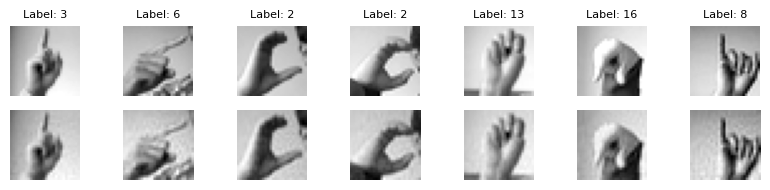

In [ ]:
# Converting to NumPy array and flattening the images
X_train_flat = X_train.to_numpy().reshape(-1, 28*28)
# Standardizing the data
scaler = StandardScaler()
X_train_flat_standardized = scaler.fit_transform(X_train_flat)
# Applying PCA with a variance 0.98
pca = PCA(0.98)
X_train_pca = pca.fit_transform(X_train_flat_standardized)

X_train_reconstructed_standardized = pca.inverse_transform(X_train_pca)
X_train_reconstructed = scaler.inverse_transform(X_train_reconstructed_standardized)

original_size = X_train_flat.size
compressed_size = X_train_pca.size
compression_ratio = original_size / compressed_size
print(f"Compression Ratio: {compression_ratio:.2f}")
print("Number of components selected by PCA:", pca.n_components_)
y = train_data.iloc[:, 0]

fig, axes = plt.subplots(2, 7, figsize=(10, 2))
for i in range(7):
    ax = axes[0, i]
    ax.imshow(X_train.iloc[i].to_numpy().reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {y.iloc[i]}", fontsize=8)
    ax = axes[1, i]
    ax.imshow(X_train_reconstructed[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()

SVD

Compression Ratio: 2.60


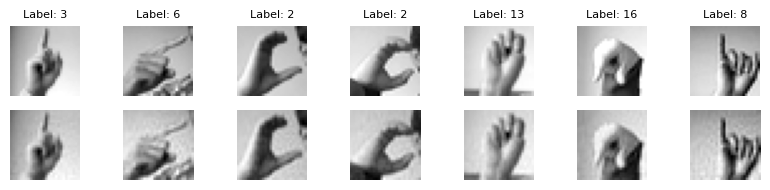

In [ ]:
# Converting to NumPy array and flattening the images
X_train_flat = X_train.to_numpy().reshape(-1, 28*28)
# Standardizing the data
scaler = StandardScaler()
X_train_flat_standardized = scaler.fit_transform(X_train_flat)
# Applying SVD with 290 components
U, S, VT = np.linalg.svd(X_train_flat_standardized, full_matrices=False)
S = np.diag(S)
n_components = 290

X_reduced = np.dot(U[:, :n_components], S[:n_components, :n_components])
X_reconstructed_standardized = np.dot(X_reduced, VT[:n_components, :])
X_reconstructed = scaler.inverse_transform(X_reconstructed_standardized).reshape(-1, 28, 28)

original_size = X_train_flat.size
compressed_size = (U[:, :n_components].size + S[:n_components, :n_components].size + VT[:n_components, :].size)
compression_ratio = original_size / compressed_size
print(f"Compression Ratio: {compression_ratio:.2f}")
y = train_data.iloc[:, 0]

fig, axes = plt.subplots(2, 7, figsize=(10, 2))
for i in range(7):
    ax = axes[0, i]
    ax.imshow(X_train.iloc[i].to_numpy().reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {y.iloc[i]}", fontsize=8)
    ax = axes[1, i]
    ax.imshow(X_reconstructed[i], cmap='gray')
    ax.axis('off')
plt.show()